## Part2: Code

In [1]:
#1. Set up the dataset - train
img_dir_train = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split_train = "train"
annotation_file_train = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split_train
print(annotation_file_train)

https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/train.json


In [2]:
#2. Set up the dataset - val
img_dir_val = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split_val = "val"
annotation_file_val = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split_val
print(annotation_file_val)

https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/val.json


In [3]:
#3. Set up the dataset - test
img_dir_test = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split_test = "test"
annotation_file_test = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split_test
print(annotation_file_test)

https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/test.json


In [4]:
#4. Visualize image given a url
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline

def visualize_image(image_url):
  image = io.imread(image_url)
  print(image_url)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

In [5]:
#5. Read the 'train', 'val' and 'test' annotations file to extract each dataset example with label

import requests
import numpy as np

split_data_train = requests.get(annotation_file_train, allow_redirects=True)
data_train = split_data_train.json()

split_data_val = requests.get(annotation_file_val, allow_redirects=True)
data_val = split_data_val.json()

split_data_test = requests.get(annotation_file_test, allow_redirects=True)
data_test= split_data_test.json()

{'image': 'VizWiz_train_00000100.jpg', 'question': 'What kind of snacks are these?', 'answers': [{'answer_confidence': 'yes', 'answer': 'chips'}, {'answer_confidence': 'yes', 'answer': 'unsuitable'}, {'answer_confidence': 'yes', 'answer': 'healthy snack'}, {'answer_confidence': 'yes', 'answer': 'unanswerable'}, {'answer_confidence': 'yes', 'answer': 'whole grain'}, {'answer_confidence': 'yes', 'answer': 'chips'}, {'answer_confidence': 'yes', 'answer': 'chips'}, {'answer_confidence': 'maybe', 'answer': 'chips'}, {'answer_confidence': 'yes', 'answer': 'unanswerable'}, {'answer_confidence': 'yes', 'answer': 'whole grain'}], 'answer_type': 'other', 'answerable': 1}
Question: What kind of snacks are these?
Label: 1
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000100.jpg


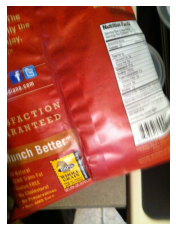

In [6]:
#6. Vizualizing 1st examples in 'train' dataset
# Change data_train, image_dir_train in line 1 & 3 respectively for visulaizing train/val/test images repectively.

# Test dataset only has 'image' and 'question' info. There are no other info available like 'answers', 'answerable' etc.

vq = data_train[100]
image_name = vq['image']
image_url = img_dir_train + image_name

print(vq)
print('Question:', vq['question'])     # Question
print('Label:', vq['answerable'])      # Label/Target = 0/1 (Binary)
visualize_image(image_url)

In [23]:
print(data_test[0])

{'image': 'VizWiz_test_00000000.jpg', 'question': 'What is this? And what color is it?'}


In [7]:
#@title
print(len(data_train))
print(type(data_train))

print(len(data_val))
print(type(data_val))

print(len(data_test))
print(type(data_test))

20523
<class 'list'>
4319
<class 'list'>
8000
<class 'list'>


In [8]:
#7. get the 'train' dataset - image, question and target - 2000 samples

image_url_data_train = []
question_data_train = []
answerable_label_train = []


for i in range(2000):
  vq_info = data_train[i]
  image_name = vq_info['image']
  img_url = img_dir_train + image_name

  image_url_data_train.append(img_url)
  question_data_train.append(vq_info['question'])
  answerable_label_train.append(vq_info['answerable'])

In [9]:
#8. get the 'val' dataset - image, question and target - 800 samples

image_url_data_val = []
question_data_val = []
answerable_label_val = []


for i in range(800):
  vq_info = data_val[i]
  image_name = vq_info['image']
  img_url = img_dir_val + image_name

  image_url_data_val.append(img_url)
  question_data_val.append(vq_info['question'])
  answerable_label_val.append(vq_info['answerable'])

In [15]:
#9. get the 'test' dataset - image and question - 1000 samples

image_url_data_test = []
question_data_test = []
answerable_label_test = []


for i in range(1000):
  vq_info = data_test[i]
  image_name = vq_info['image']
  img_url = img_dir_test + image_name

  image_url_data_test.append(img_url)
  question_data_test.append(vq_info['question'])

In [12]:
#@title
print(len(image_url_data_train))
print(len(question_data_train))
print(len(answerable_label_train))

2000
2000
2000


In [13]:
#@title
print(len(image_url_data_val))
print(len(question_data_val))
print(len(answerable_label_val))

800
800
800


In [16]:
#@title
print(len(image_url_data_test))
print(len(question_data_test))

print(image_url_data_test[0])
print(image_url_data_test[len(image_url_data_test)-1])

1000
1000
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_test_00000000.jpg
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_test_00000999.jpg


In [17]:
import pandas as pd

df_question_train = pd.DataFrame({'Question': question_data_train})
df_question_val = pd.DataFrame({'Question': question_data_val})
df_question_test = pd.DataFrame({'Question': question_data_test})

In [18]:
import re

df_question_train['Question'] = df_question_train['Question'].apply(lambda x : x.lower())
df_question_train['Question'] = df_question_train['Question'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))
#df_question_train['Question'] = df_question_train['Question'].replace(r'\s+|\\n', ' ', regex=True)

df_question_train.head()

,Question
0,whats the name of this product
1,can you tell me what is in this can please
2,is this enchilada sauce or is this tomatoes t...
3,what is the captcha on this screenshot
4,what is this item


In [19]:
df_question_val['Question'] = df_question_val['Question'].apply(lambda x : x.lower())
df_question_val['Question'] = df_question_val['Question'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))
#df_question_val['Question'] = df_question_val['Question'].replace(r'\s+|\\n', ' ', regex=True)

df_question_val.head()

,Question
0,ok there is another picture i hope it is a bet...
1,can you tell me what this medicine is please
2,what is the title of this book
3,which one is the blue one
4,what does the arrow say


In [20]:
df_question_test['Question'] = df_question_test['Question'].apply(lambda x : x.lower())
df_question_test['Question'] = df_question_test['Question'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))

df_question_test.head()

,Question
0,what is this and what color is it
1,what is this
2,has this oven gotten up to four hundred fifty ...
3,what is this
4,what is this


In [21]:
question_data_train_clean = df_question_train['Question'].tolist()
print(question_data_train_clean[0:5])

question_data_val_clean = df_question_val['Question'].tolist()
print(question_data_val_clean[0:5])

question_data_test_clean = df_question_test['Question'].tolist()
print(question_data_test_clean[0:5])

['whats the name of this product', 'can you tell me what is in this can please', 'is this enchilada sauce or is this tomatoes  thank you', 'what is the captcha on this screenshot', 'what is this item']
['ok there is another picture i hope it is a better one', 'can you tell me what this medicine is please', 'what is the title of this book ', 'which one is the blue one', 'what does the arrow say']
['what is this and what color is it', 'what is this', 'has this oven gotten up to four hundred fifty degrees fahrenheit yet', 'what is this', 'what is this']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

vectorizer = CountVectorizer()
tokenizer = Tokenizer(num_words=10000, split=' ')
tokenizer.fit_on_texts(question_data_train_clean)


In [55]:
#@title
y = [x for x in question_data_train_clean[110].split(' ')]
print(y)
feature = vectorizer.fit([x for x in question_data_train_clean[110].split(' ')])
print(feature.get_feature_names())
z = tokenizer.texts_to_sequences([" ".join(feature.get_feature_names())])
print(z[0])
q = [1, 2, 3]
n = []
n.append(z[0])
n.append(q)

p = pad_sequences(n)
print(p)

#vectors_train = vectorizer.transform(question_data_train_clean)

['what', 'does', 'the', 'sky', 'look', 'like', 'thank', 'you']
['does', 'like', 'look', 'sky', 'thank', 'the', 'what', 'you']
[18, 42, 54, 114, 23, 4, 1, 6]
[[ 18  42  54 114  23   4   1   6]
 [  0   0   0   0   0   1   2   3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
#@title
print(n)

[[18, 42, 54, 114, 23, 4, 1, 6], [1, 2, 3]]


In [49]:
df_question_train['Num_words'] = df_question_train['Question'].apply(lambda x: len(x.split()))
df_question_train.Num_words.value_counts()

3     289
4     278
5     219
6     181
7     114
8      63
9      61
10     54
2      39
11     27
12     26
14     25
13     22
16     18
18     14
15     13
22      9
20      6
17      6
21      4
23      4
29      3
30      3
19      3
26      3
43      2
32      2
24      2
31      2
40      1
33      1
28      1
39      1
49      1
34      1
35      1
27      1
Name: Num_words, dtype: int64

In [24]:
import tensorflow as tf
from PIL import Image
from urllib import request
from io import BytesIO
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image


In [26]:
model_image = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
def extract_img_features(image_url):
  # Read image using image_url
  res = request.urlopen(image_url).read()
  img = Image.open(BytesIO(res)).resize((128,128))

  # Preprocess the image data after reading before inputting to the model
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis = 0)
  img_data = preprocess_input(img_data)

  # Get the feature from the VGG16 model last but one layer.
  features_img = model_image.predict(img_data, verbose=False)
  arr = np.array(features_img[0])
  x_img_feature = arr.ravel()

  return x_img_feature

#plt.imshow(img)

In [30]:
def extract_qn_feature(question):
  qn_words = vectorizer.fit([x for x in question.split(' ')])
  qn_feature_raw = tokenizer.texts_to_sequences([" ".join(qn_words.get_feature_names())])
  qn_feature = qn_feature_raw[0]

  return qn_feature

In [31]:
# Preparing 'train' dataset features and labels

X_train = []
Y_train = []
for i in range(len(image_url_data_train)):
  img_feature = extract_img_features(image_url_data_train[i])
  qn_feature = extract_qn_feature(question_data_train_clean[i])
  multimodel_feature = np.concatenate((qn_feature, img_feature))

  X_train.append(multimodel_feature)
  Y_train.append(answerable_label_train[i])


In [32]:
X_train_pad = pad_sequences(X_train)

In [33]:
X_train_arr = np.asarray(X_train_pad)
Y_train_arr = np.asarray(Y_train)

print(X_train_arr.shape)
print(Y_train_arr.shape)
print(X_train_arr[0:2])

(2000, 8228)
(2000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 8 0]]


In [34]:
# Preparing 'val' dataset features and labels

X_val = []
Y_val = []
for i in range(len(image_url_data_val)):
  img_feature = extract_img_features(image_url_data_val[i])
  qn_feature = extract_qn_feature(question_data_val_clean[i])
  multimodel_feature = np.concatenate((qn_feature, img_feature))

  X_val.append(multimodel_feature)
  Y_val.append(answerable_label_val[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
max_len_train = X_train_arr.shape[1]
print(max_len_train)
X_val_pad = pad_sequences(X_val, maxlen=max_len_train)

8228


In [36]:
X_val_arr = np.asarray(X_val_pad)
Y_val_arr = np.asarray(Y_val)

print(X_val_arr.shape)
print(Y_val_arr.shape)

(800, 8228)
(800,)


In [37]:
# Preparing 'test' dataset features. It does not have labels.

X_test = []
#Y_test = []
for i in range(len(image_url_data_test)):
  img_feature = extract_img_features(image_url_data_test[i])
  qn_feature = extract_qn_feature(question_data_test_clean[i])
  multimodel_feature = np.concatenate((qn_feature, img_feature))

  X_test.append(multimodel_feature)
  #Y_val.append(answerable_label_val[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
X_test = X_val[800: len(X_val)]
print(len(X_test))

1000


In [44]:
X_val_arr.shape

(800, 8228)

In [42]:
max_len_train = X_train_arr.shape[1]
print(max_len_train)
X_test_pad = pad_sequences(X_test, maxlen=max_len_train)

8228


In [43]:
X_test_arr = np.asarray(X_test_pad)
#Y_test_arr = np.asarray(Y_test)

print(X_test_arr.shape)
#print(Y_test_arr.shape)

(1000, 8228)


In [45]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [46]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [47]:
def plot_confusion_matrix(y_true, y_pred, title):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.title(title)

In [49]:
# Model implementation - Model 1

opt = SGD(learning_rate=0.01)
model_1 = Sequential()

model_1.add(Dense(8228, activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ["accuracy"])

trained_model_1 = model_1.fit(X_train_arr, Y_train_arr, epochs = 6, validation_data = (X_val_arr, Y_val_arr))

Epoch 1/6
63/63 [==============================] - 22s 331ms/step - loss: 19.8938 - accuracy: 0.6495 - val_loss: 4.1433 - val_accuracy: 0.5800
Epoch 2/6
63/63 [==============================] - 21s 328ms/step - loss: 1.3484 - accuracy: 0.8470 - val_loss: 7.7450 - val_accuracy: 0.5700
Epoch 3/6
63/63 [==============================] - 21s 329ms/step - loss: 0.6382 - accuracy: 0.9310 - val_loss: 3.6253 - val_accuracy: 0.5925
Epoch 4/6
63/63 [==============================] - 21s 329ms/step - loss: 0.3014 - accuracy: 0.9500 - val_loss: 3.8317 - val_accuracy: 0.5863
Epoch 5/6
63/63 [==============================] - 21s 329ms/step - loss: 0.1769 - accuracy: 0.9765 - val_loss: 4.3726 - val_accuracy: 0.5775
Epoch 6/6
63/63 [==============================] - 21s 330ms/step - loss: 0.2066 - accuracy: 0.9765 - val_loss: 4.0422 - val_accuracy: 0.5962


25/25 [==============================] - 6s 225ms/step
Model-3 Results:

              precision    recall  f1-score   support

           0       0.65      0.26      0.37       366
           1       0.58      0.88      0.70       434

    accuracy                           0.60       800
   macro avg       0.62      0.57      0.54       800
weighted avg       0.61      0.60      0.55       800



AP for model 1: 57.977



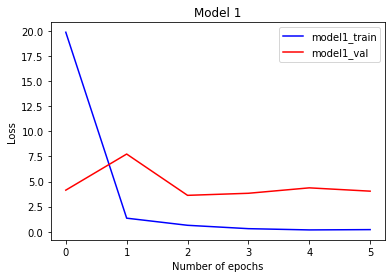

In [52]:
y_pred_model1 = (model_1.predict(X_val_arr) > 0.5).astype("int32")
y_pred_1 = np.array(y_pred_model1)

# y_pred_3 vs Y_val_arr
print('Model-3 Results:')
print()
print(classification_report(Y_val_arr,y_pred_1))
print()
#plot_confusion_matrix(Y_val_arr,y_pred_1, 'Model-1')
average_precision_1 = average_precision_score(Y_val_arr,y_pred_1)
print("\nAP for model 1: {}".format(round(100*average_precision_1, 4)))
print()

# Plot Learning Curve 7 (accuracy vs training iterations) for -> Add Dropout on Base Model 2 

plt.plot(trained_model_1.history["loss"], color = 'blue', label = 'model1_train')
plt.plot(trained_model_1.history["val_loss"], color = 'red', label = 'model1_val')

plt.title("Model 1")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [54]:
# Model implementation - Model 2

opt = SGD(learning_rate=0.01)
model_2 = Sequential()


model_2.add(Dense(128, activation='tanh'))
#model_2.add(Dropout(0.25))
model_2.add(Dense(128, activation='tanh'))
#model_2.add(Dropout(0.25))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ["accuracy"])

trained_model_2 = model_2.fit(X_train_arr, Y_train_arr, epochs = 6, validation_data = (X_val_arr, Y_val_arr))

Epoch 1/6
63/63 [==============================] - 1s 13ms/step - loss: 0.6008 - accuracy: 0.7005 - val_loss: 0.7186 - val_accuracy: 0.5950
Epoch 2/6
63/63 [==============================] - 1s 11ms/step - loss: 0.4638 - accuracy: 0.7865 - val_loss: 0.7821 - val_accuracy: 0.5838
Epoch 3/6
63/63 [==============================] - 1s 11ms/step - loss: 0.3795 - accuracy: 0.8435 - val_loss: 0.7641 - val_accuracy: 0.5950
Epoch 4/6
63/63 [==============================] - 1s 11ms/step - loss: 0.3133 - accuracy: 0.8815 - val_loss: 0.8409 - val_accuracy: 0.5888
Epoch 5/6
63/63 [==============================] - 1s 11ms/step - loss: 0.2664 - accuracy: 0.9045 - val_loss: 0.8274 - val_accuracy: 0.5863
Epoch 6/6
63/63 [==============================] - 1s 11ms/step - loss: 0.2185 - accuracy: 0.9255 - val_loss: 0.9069 - val_accuracy: 0.5850


25/25 [==============================] - 0s 5ms/step
Model-2 Results:

              precision    recall  f1-score   support

           0       0.61      0.25      0.36       366
           1       0.58      0.87      0.69       434

    accuracy                           0.58       800
   macro avg       0.60      0.56      0.53       800
weighted avg       0.59      0.58      0.54       800



AP for model 2: 57.3656



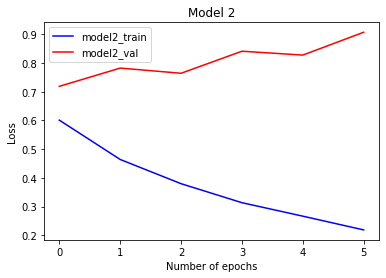

In [55]:
#@title
y_pred_model2 = (model_2.predict(X_val_arr) > 0.5).astype("int32")
y_pred_2 = np.array(y_pred_model2)

# y_pred_3 vs Y_val_arr

print('Model-2 Results:')
print()
print(classification_report(Y_val_arr,y_pred_2))
print()
#plot_confusion_matrix(Y_val_arr,y_pred_2, 'Model-2')
average_precision_2 = average_precision_score(Y_val_arr,y_pred_2)
print("\nAP for model 2: {}".format(round(100*average_precision_2, 4)))
print()

# Plot Learning Curve 7 (accuracy vs training iterations) for -> Add Dropout on Base Model 2 

plt.plot(trained_model_2.history["loss"], color = 'blue', label = 'model2_train')
plt.plot(trained_model_2.history["val_loss"], color = 'red', label = 'model2_val')

plt.title("Model 2")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

In [56]:
# Model implementation - Model 3

opt = SGD(learning_rate=0.01)
model_3 = Sequential()

model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

trained_model_3 = model_3.fit(X_train_arr, Y_train_arr, epochs = 6, validation_data = (X_val_arr, Y_val_arr))

Epoch 1/6
63/63 [==============================] - 1s 12ms/step - loss: 0.6048 - accuracy: 0.7050 - val_loss: 0.7956 - val_accuracy: 0.5475
Epoch 2/6
63/63 [==============================] - 1s 9ms/step - loss: 0.5317 - accuracy: 0.7455 - val_loss: 0.7831 - val_accuracy: 0.5612
Epoch 3/6
63/63 [==============================] - 1s 11ms/step - loss: 0.5009 - accuracy: 0.7690 - val_loss: 0.7607 - val_accuracy: 0.5863
Epoch 4/6
63/63 [==============================] - 1s 10ms/step - loss: 0.4920 - accuracy: 0.7705 - val_loss: 0.7083 - val_accuracy: 0.6012
Epoch 5/6
63/63 [==============================] - 1s 9ms/step - loss: 0.4797 - accuracy: 0.7830 - val_loss: 0.8449 - val_accuracy: 0.5700
Epoch 6/6
63/63 [==============================] - 1s 11ms/step - loss: 0.4581 - accuracy: 0.7930 - val_loss: 0.7423 - val_accuracy: 0.6225


25/25 [==============================] - 0s 4ms/step
Model-3 Results:

              precision    recall  f1-score   support

           0       0.71      0.30      0.42       366
           1       0.60      0.89      0.72       434

    accuracy                           0.62       800
   macro avg       0.65      0.60      0.57       800
weighted avg       0.65      0.62      0.58       800



AP for model 3: 59.6127



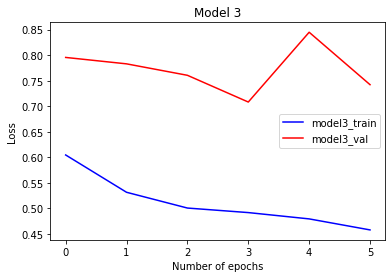

In [57]:
y_pred_model3 = (model_3.predict(X_val_arr) > 0.5).astype("int32")
y_pred_3 = np.array(y_pred_model3)

# y_pred_3 vs Y_val_arr

print('Model-3 Results:')
print()
print(classification_report(Y_val_arr,y_pred_3))
print()
#plot_confusion_matrix(Y_val_arr,y_pred_3, 'Model-3')
average_precision_3 = average_precision_score(Y_val_arr,y_pred_3)
print("\nAP for model 3: {}".format(round(100*average_precision_3, 4)))
print()

# Plot Learning Curve 7 (accuracy vs training iterations) for -> Add Dropout on Base Model 2 

plt.plot(trained_model_3.history["loss"], color = 'blue', label = 'model3_train')
plt.plot(trained_model_3.history["val_loss"], color = 'red', label = 'model3_val')

plt.title("Model 3")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()